# Xarxa neuronal

In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold
from scipy.stats import uniform as sp_rand
from scipy.stats import randint
from time import time
from sklearn import preprocessing

Using TensorFlow backend.


## Consum diari total multivariate one-step

In [2]:
daily=pd.read_csv('C:/Users/Laura/Desktop/Smart meters London/workspace R/Dades netes/Final/daily_agr_mitjanaLlarPerDia.csv')
daily.head(5)

,date,apparentTemperatureMax,sunsetTimeHour,weekday,season,cloudCover,humidity,visibility,month,energy_sum
0,2013-01-16,-0.15,16,3,winter,0.48,0.91,4.12,1,13.147536
1,2013-01-20,-0.46,16,7,winter,0.85,0.91,5.10,1,15.021900
2,2013-01-10,2.36,16,4,winter,0.70,0.94,5.21,1,12.066789
3,2013-01-06,6.98,16,7,winter,0.67,0.96,5.50,1,12.422263
4,2012-01-31,1.13,16,2,winter,0.55,0.84,5.62,1,13.890518


In [3]:
#Ens quedem amb date i energy_sum, ordenem valors per data i resetejem index
daily_dia=daily[['date','energy_sum','apparentTemperatureMax','humidity','visibility','cloudCover']].sort_values(by=['date']).reset_index()
daily_dia.head(5)


,index,date,energy_sum,apparentTemperatureMax,humidity,visibility,cloudCover
0,677,2011-11-23,6.952692,10.36,0.93,8.06,0.36
1,691,2011-11-24,8.536480,12.93,0.89,10.64,0.41
2,713,2011-11-25,9.499781,13.03,0.79,12.38,0.48
3,728,2011-11-26,10.267707,12.96,0.81,13.07,0.44
4,729,2011-11-27,10.850805,13.54,0.72,13.08,0.42


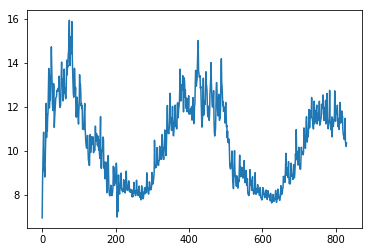

In [16]:
plt.plot(daily_dia )

In [4]:

daily_dia['y+1']=daily_dia['energy_sum'].shift(-1)
daily_dia['y+2']=daily_dia['energy_sum'].shift(-2)
daily_dia['y+3']=daily_dia['energy_sum'].shift(-3)
daily_dia['y+4']=daily_dia['energy_sum'].shift(-4)
daily_dia['y+5']=daily_dia['energy_sum'].shift(-5)
daily_dia['y+6']=daily_dia['energy_sum'].shift(-6)

daily_dia['t-1']=daily_dia['energy_sum'].shift(1)
daily_dia['t-2']=daily_dia['energy_sum'].shift(2)
daily_dia['t-3']=daily_dia['energy_sum'].shift(3)
daily_dia['t-4']=daily_dia['energy_sum'].shift(4)
daily_dia['t-5']=daily_dia['energy_sum'].shift(5)
daily_dia['t-6']=daily_dia['energy_sum'].shift(6)
daily_dia['t-7']=daily_dia['energy_sum'].shift(7)
daily_dia['t-8']=daily_dia['energy_sum'].shift(8)

daily_dia['temp(t-1)']=daily_dia['apparentTemperatureMax'].shift(1)
daily_dia['temp(t-2)']=daily_dia['apparentTemperatureMax'].shift(2)
daily_dia['temp(t-3)']=daily_dia['apparentTemperatureMax'].shift(3)
daily_dia['temp(t-4)']=daily_dia['apparentTemperatureMax'].shift(4)
daily_dia['temp(t-5)']=daily_dia['apparentTemperatureMax'].shift(5)
daily_dia['temp(t-6)']=daily_dia['apparentTemperatureMax'].shift(6)
daily_dia['temp(t-7)']=daily_dia['apparentTemperatureMax'].shift(7)
daily_dia['temp(t-8)']=daily_dia['apparentTemperatureMax'].shift(8)

daily_dia['humidity(t-1)']=daily_dia['humidity'].shift(1)
daily_dia['humidity(t-2)']=daily_dia['humidity'].shift(2)
daily_dia['humidity(t-3)']=daily_dia['humidity'].shift(3)
daily_dia['humidity(t-4)']=daily_dia['humidity'].shift(4)
daily_dia['humidity(t-5)']=daily_dia['humidity'].shift(5)
daily_dia['humidity(t-6)']=daily_dia['humidity'].shift(6)
daily_dia['humidity(t-7)']=daily_dia['humidity'].shift(7)
daily_dia['humidity(t-8)']=daily_dia['humidity'].shift(8)


daily_dia['visibility(t-1)']=daily_dia['visibility'].shift(1)
daily_dia['visibility(t-2)']=daily_dia['visibility'].shift(2)
daily_dia['visibility(t-3)']=daily_dia['visibility'].shift(3)
daily_dia['visibility(t-4)']=daily_dia['visibility'].shift(4)
daily_dia['visibility(t-5)']=daily_dia['visibility'].shift(5)
daily_dia['visibility(t-6)']=daily_dia['visibility'].shift(6)
daily_dia['visibility(t-7)']=daily_dia['visibility'].shift(7)
daily_dia['visibility(t-8)']=daily_dia['visibility'].shift(8)

daily_dia['cloudCover(t-1)']=daily_dia['cloudCover'].shift(1)
daily_dia['cloudCover(t-2)']=daily_dia['cloudCover'].shift(2)
daily_dia['cloudCover(t-3)']=daily_dia['cloudCover'].shift(3)
daily_dia['cloudCover(t-4)']=daily_dia['cloudCover'].shift(4)
daily_dia['cloudCover(t-5)']=daily_dia['cloudCover'].shift(5)
daily_dia['cloudCover(t-6)']=daily_dia['cloudCover'].shift(6)
daily_dia['cloudCover(t-7)']=daily_dia['cloudCover'].shift(7)
daily_dia['cloudCover(t-8)']=daily_dia['cloudCover'].shift(8)




daily_dia

,index,date,energy_sum,apparentTemperatureMax,humidity,visibility,cloudCover,y+1,y+2,y+3,...,visibility(t-7),visibility(t-8),cloudCover(t-1),cloudCover(t-2),cloudCover(t-3),cloudCover(t-4),cloudCover(t-5),cloudCover(t-6),cloudCover(t-7),cloudCover(t-8)
0,677,2011-11-23,6.952692,10.36,0.93,8.06,0.36,8.536480,9.499781,10.267707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,691,2011-11-24,8.536480,12.93,0.89,10.64,0.41,9.499781,10.267707,10.850805,...,NaN,NaN,0.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,713,2011-11-25,9.499781,13.03,0.79,12.38,0.48,10.267707,10.850805,9.103382,...,NaN,NaN,0.41,0.36,NaN,NaN,NaN,NaN,NaN,NaN
3,728,2011-11-26,10.267707,12.96,0.81,13.07,0.44,10.850805,9.103382,9.274873,...,NaN,NaN,0.48,0.41,0.36,NaN,NaN,NaN,NaN,NaN
4,729,2011-11-27,10.850805,13.54,0.72,13.08,0.42,9.103382,9.274873,8.813513,...,NaN,NaN,0.44,0.48,0.41,0.36,NaN,NaN,NaN,NaN
5,704,2011-11-28,9.103382,12.58,0.86,11.84,0.56,9.274873,8.813513,9.227707,...,NaN,NaN,0.42,0.44,0.48,0.41,0.36,NaN,NaN,NaN
6,718,2011-11-29,9.274873,13.47,0.82,12.57,0.60,8.813513,9.227707,10.145910,...,NaN,NaN,0.56,0.42,0.44,0.48,0.41,0.36,NaN,NaN
7,727,2011-11-30,8.813513,11.87,0.78,13.05,0.31,9.227707,10.145910,10.780273,...,8.06,NaN,0.60,0.56,0.42,0.44,0.48,0.41,0.36,NaN
8,778,2011-12-01,9.227707,12.15,0.82,12.15,0.57,10.145910,10.780273,12.163127,...,10.64,8.06,0.31,0.60,0.56,0.42,0.44,0.48,0.41,0.36
9,773,2011-12-02,10.145910,5.33,0.87,11.89,0.32,10.780273,12.163127,10.609714,...,12.38,10.64,0.57,0.31,0.60,0.56,0.42,0.44,0.48,0.41


In [5]:
#Ens quedem amb energies i temperatures 
#No agafem apparent temperature max ja que quan fem la predicció representa que no ho sabem
daily_dia=daily_dia.drop(['index','date','apparentTemperatureMax', 'humidity', 'visibility', 'cloudCover'], axis=1)
#daily_dia=daily_dia[['energy_sum','t-1','t-2','t-3','t-4','t-5','t-6','t-7','t-8','temp(t-1)','temp(t-2)','temp(t-3)','temp(t-4)','temp(t-5)','temp(t-6)','temp(t-7)','temp(t-8)','humidity(t-1)','humidity(t-2)','humidity(t-3)','humidity(t-4)','humidity(t-5)','humidity(t-6)','humidity(t-7)','humidity(t-8)']]
daily_dia.head(5)


,energy_sum,y+1,y+2,y+3,y+4,y+5,y+6,t-1,t-2,t-3,...,visibility(t-7),visibility(t-8),cloudCover(t-1),cloudCover(t-2),cloudCover(t-3),cloudCover(t-4),cloudCover(t-5),cloudCover(t-6),cloudCover(t-7),cloudCover(t-8)
0,6.952692,8.536480,9.499781,10.267707,10.850805,9.103382,9.274873,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.536480,9.499781,10.267707,10.850805,9.103382,9.274873,8.813513,6.952692,NaN,NaN,...,NaN,NaN,0.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.499781,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,8.536480,6.952692,NaN,...,NaN,NaN,0.41,0.36,NaN,NaN,NaN,NaN,NaN,NaN
3,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,9.499781,8.536480,6.952692,...,NaN,NaN,0.48,0.41,0.36,NaN,NaN,NaN,NaN,NaN
4,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,10.780273,10.267707,9.499781,8.536480,...,NaN,NaN,0.44,0.48,0.41,0.36,NaN,NaN,NaN,NaN


In [6]:
#Eliminem les 8 primeres files ja que contenen NaN (valors buits)

daily_dia=daily_dia.drop([0,1,2,3,4,5,6,7])
daily_dia=daily_dia.drop([829,828,827,826,825,824,823])


In [7]:
len(daily_dia)


815

In [8]:

#normalitzem
scaler=preprocessing.MinMaxScaler(feature_range=(0, 1))
daily_dia_norm=scaler.fit_transform(daily_dia)



array([0.25530572, 0.2361457 , 0.43137821, 0.36623108, 0.28043381,
       0.17280805, 0.        , 0.48124829, 0.45688475, 0.48316452,
       0.46728716, 0.46920339, 0.46646592, 0.39611278])

In [9]:


#Seleccionem dades per test i train
y_daily=daily_dia_norm[:,0:7]

X_daily=daily_dia_norm[:,7:48]

#y_daily=daily_dia['energy_sum']
#X_daily=daily_dia.drop(['energy_sum'], axis='columns')



#Reshape de [samples,timesteps] a [samples,timesteps,features]

#Enlloc de 14 features en son 7 de una feature i 7 duna altre
X_daily=np.reshape(X_daily, (X_daily.shape[0], 8,5))



In [10]:
# definim model
import tensorflow as tf
model =Sequential()
model.add(LSTM(50, activation='relu', input_shape=(8, 5)))
model.add(Dense(7))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [11]:
import math
from sklearn.metrics import mean_squared_error

#Walk forward per test i train
minim=100
n_train=465
lenght=len(daily_dia)

llista_evaluate=list()
llista_prediccions=list()
llista_preditrain=list()
llista_scores=list()
llista_scoretrain=list()
sumScores=0

for i in range(n_train,lenght):
    minim=minim+1
    X_train,X_test= X_daily[minim:i],X_daily[i:i+1]
    y_train,y_test= y_daily[minim:i],y_daily[i:i+1]

    #fem fit al model
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #mostrem score per cada model
    score=model.evaluate(X_test,y_test,verbose=0)
    llista_evaluate.append(score)
    
    #Predim per cadascun
    preditest=model.predict(X_test)
    llista_prediccions.append(preditest)
    
    preditrain=model.predict(X_train)
    llista_preditrain.append(preditrain)
    
    trainScore = math.sqrt(mean_squared_error(y_train, preditrain))
    llista_scoretrain.append(trainScore )
    

    testScore = math.sqrt(mean_squared_error(y_test, preditest))
    llista_scores.append(testScore)
   
    sumScores=sumScores+testScore

Instructions for updating:
Use tf.cast instead.


In [12]:
#Dividim la suma de scores de test entre el nombre de prediccions per obtenir la mitjana
sumScores/(lenght-n_train)

0.06788682503172708

In [37]:
#Fem llista amb les prediccions
llista_p=list()
for i in range(len(llista_prediccions)):
    llista_p.append(llista_prediccions[i].tolist())
    
llista_p

[[[0.4917013347148895,
   0.47340282797813416,
   0.48966366052627563,
   0.4917079210281372,
   0.5067949295043945,
   0.4789063632488251,
   0.4803459346294403]],
 [[0.4612216651439667,
   0.4625158905982971,
   0.4735243022441864,
   0.48702526092529297,
   0.5200659036636353,
   0.4861201047897339,
   0.4950619339942932]],
 [[0.5587665438652039,
   0.5778605341911316,
   0.5930098295211792,
   0.5776011943817139,
   0.5810070633888245,
   0.5576691627502441,
   0.5555576086044312]],
 [[0.655498206615448,
   0.6696635484695435,
   0.6279109120368958,
   0.5747554898262024,
   0.584866464138031,
   0.5815502405166626,
   0.568965494632721]],
 [[0.6453260779380798,
   0.5840585231781006,
   0.5557864308357239,
   0.5579977035522461,
   0.5673198699951172,
   0.588340163230896,
   0.5464677214622498]],
 [[0.5294060111045837,
   0.5075514316558838,
   0.5193391442298889,
   0.5960765480995178,
   0.6270435452461243,
   0.6060488224029541,
   0.594917356967926]],
 [[0.456078439950943,
  

In [56]:
#Fem llista amb la predicció de només el dia següent
llista_p0=list()
for i in range(len(llista_p)):
    llista_p0.append(llista_p[i][0][0])

In [57]:
#Fem llista amb la predicció de 2 dies
llista_p1=list()
for i in range(len(llista_p)):
    llista_p1.append(llista_p[i][0][1])

In [58]:
#Altres dies

llista_p2=list()
for i in range(len(llista_p)):
    llista_p2.append(llista_p[i][0][2])
    
llista_p3=list()
for i in range(len(llista_p)):
    llista_p3.append(llista_p[i][0][3])
    
llista_p4=list()
for i in range(len(llista_p)):
    llista_p4.append(llista_p[i][0][4])
    
llista_p5=list()
for i in range(len(llista_p)):
    llista_p5.append(llista_p[i][0][5])
    
llista_p6=list()
for i in range(len(llista_p)):
    llista_p6.append(llista_p[i][0][6])

In [61]:
score0=math.sqrt(mean_squared_error(y_daily[n_train:lenght,0], llista_p0))
print("Error predicció 1 dia següent: {}".format(score0))
score1=math.sqrt(mean_squared_error(y_daily[n_train:lenght,1], llista_p1))
print("Error predicció 1 dia següent: {}".format(score1))
score2=math.sqrt(mean_squared_error(y_daily[n_train:lenght,2], llista_p2))
print("Error predicció 1 dia següent: {}".format(score2))
score3=math.sqrt(mean_squared_error(y_daily[n_train:lenght,3], llista_p3))
print("Error predicció 1 dia següent: {}".format(score3))
score4=math.sqrt(mean_squared_error(y_daily[n_train:lenght,4], llista_p4))
print("Error predicció 1 dia següent: {}".format(score4))
score5=math.sqrt(mean_squared_error(y_daily[n_train:lenght,5], llista_p5))
print("Error predicció 1 dia següent: {}".format(score5))
score6=math.sqrt(mean_squared_error(y_daily[n_train:lenght,6], llista_p6))
print("Error predicció 1 dia següent: {}".format(score6))

Error predicció 1 dia següent: 0.055251696046144314
Error predicció 1 dia següent: 0.06832529766672948
Error predicció 1 dia següent: 0.07813421105684255
Error predicció 1 dia següent: 0.09076733536533071
Error predicció 1 dia següent: 0.08530721529594153
Error predicció 1 dia següent: 0.08309003380499033
Error predicció 1 dia següent: 0.07993006069496253


In [14]:


predis=list()

for i in range(len(llista_prediccions)):
    predi=llista_prediccions[i].tolist()
    predis.append(predi)

predis=np.reshape(predis, (len(llista_prediccions),7)  )

predis


array([[0.49170133, 0.47340283, 0.48966366, ..., 0.50679493, 0.47890636,
        0.48034593],
       [0.46122167, 0.46251589, 0.4735243 , ..., 0.5200659 , 0.4861201 ,
        0.49506193],
       [0.55876654, 0.57786053, 0.59300983, ..., 0.58100706, 0.55766916,
        0.55555761],
       ...,
       [0.47479051, 0.39193276, 0.46481001, ..., 0.49955657, 0.51752841,
        0.34443393],
       [0.4404763 , 0.48348251, 0.4443087 , ..., 0.46815312, 0.41918528,
        0.42251596],
       [0.44794756, 0.41577277, 0.48827636, ..., 0.29434064, 0.39685303,
        0.3423686 ]])

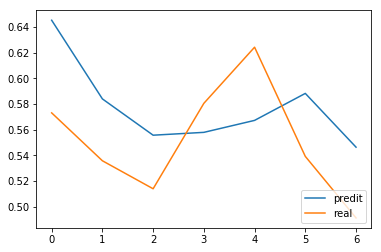

In [19]:
##Mostrem
plt.plot(predis[4], label="predit")
plt.plot(y_daily[n_train+4], label="real")
plt.legend(loc="lower right")
plt.show()

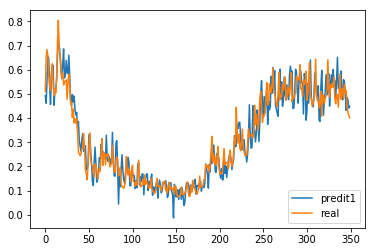

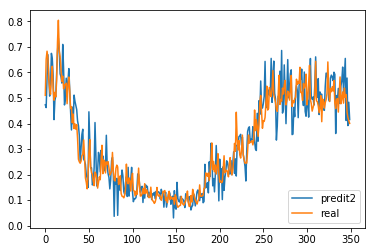

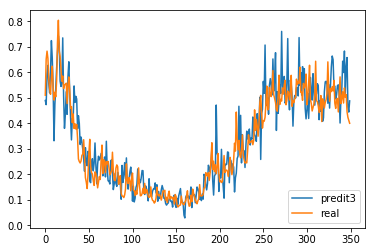

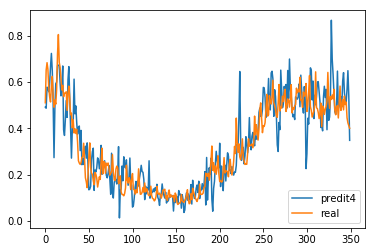

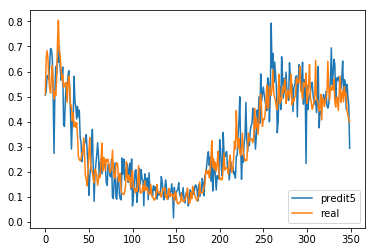

In [63]:
##Mostrem
plt.plot(llista_p0, label="predit1")
plt.plot(y_daily[n_train:lenght,0], label="real")
plt.legend(loc="lower right")
plt.show()

plt.plot(llista_p1, label="predit2")
plt.plot(y_daily[n_train:lenght,0], label="real")
plt.legend(loc="lower right")
plt.show()


plt.plot(llista_p2, label="predit3")
plt.plot(y_daily[n_train:lenght,0], label="real")
plt.legend(loc="lower right")
plt.show()

plt.plot(llista_p3, label="predit4")
plt.plot(y_daily[n_train:lenght,0], label="real")
plt.legend(loc="lower right")
plt.show()

plt.plot(llista_p4, label="predit5")
plt.plot(y_daily[n_train:lenght,0], label="real")
plt.legend(loc="lower right")
plt.show()
